## A quick example of the power of Lie groups.

Try to write the best integrator for the dynamics:

$
\dot{x} = -\omega \sin{\theta} \\
\dot{y} = \omega \cos{\theta} \\
\dot{\theta} = \omega
$

With initial conditions: $x=1$, $y=0$, $\theta=0$.

This can be thought of a constant vector field on a curved manifold, which is a circle of radius 1.

### The naive approach

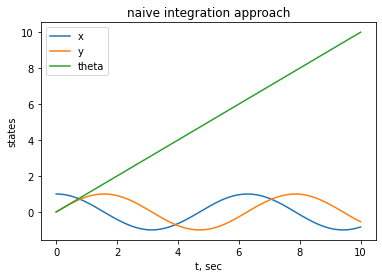

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

omega = 1

def f(t, x_vect):
    x, y, theta = x_vect
    x_dot = -omega*np.sin(theta)
    y_dot = omega*np.cos(theta)
    theta_dot = omega
    return [x_dot, y_dot, theta_dot]

t = np.linspace(0, 10, 100)
x0 = [1, 0, 0]
res = scipy.integrate.solve_ivp(fun=f, t_span=[t[0], t[-1]], y0=x0, t_eval=t)
x_vect = res.y.T
plt.plot(t, x_vect, label=['x', 'y', 'theta'])
plt.legend()
plt.xlabel('t, sec')
plt.ylabel('states')
plt.title('naive integration approach');

This looks like a reasonable result, but in fact, we are already accumulating error. When integrating, we have the constraint:

$x^2 + y^2 = 1$

We are beginning to drift off the surface of the circle of radius 1 as shown by the plot below:

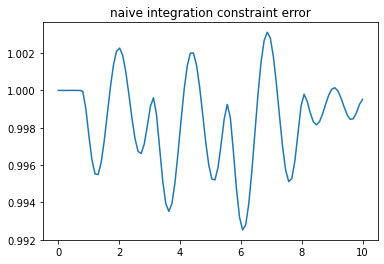

In [3]:
r = x_vect[:, 0]**2 + x_vect[:, 1]**2
plt.plot(t, r)
plt.title('naive integration constraint error');

### Lie Group approach

This seems trivial, but the same idea we can extend to higher dimensions.

Text(0, 0.5, 'y')

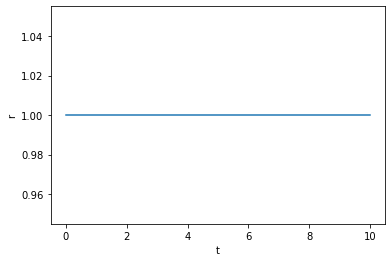

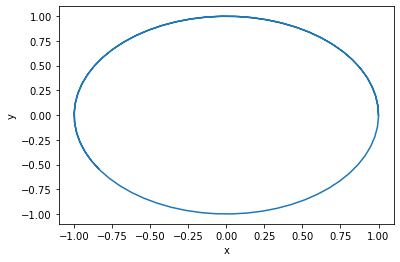

In [10]:
t = np.linspace(0, 10, 100)
theta = omega*t # integrate in lie algebra

# matrix exponential
x = np.cos(theta)
y = np.sin(theta)

plt.figure()
plt.plot(t, x**2 + y**2)
plt.xlabel('t')
plt.ylabel('r')

plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')